In [1]:
from polybinderCG.coarse_grain import System
import signac
import matplotlib.pyplot as plt
import numpy as np
import os
from cmeutils.structure import bond_distribution, angle_distribution
from cmeutils.plotting import get_histogram


In [2]:
def moving_average_smoothing(raw_data, w):
        return np.convolve(raw_data, np.ones(w), "same")/w

# Comparing single-chain simulations

In [3]:
project = signac.get_project("../target-sims/single-chain-target-runs/polybinder-flow/")
project2 = signac.get_project("../side-projects/single-chain-new-chrages/polybinder-flow/")

In [4]:
project2.detect_schema()

ProjectSchema(<len=39>)

(0.75, 3.14)

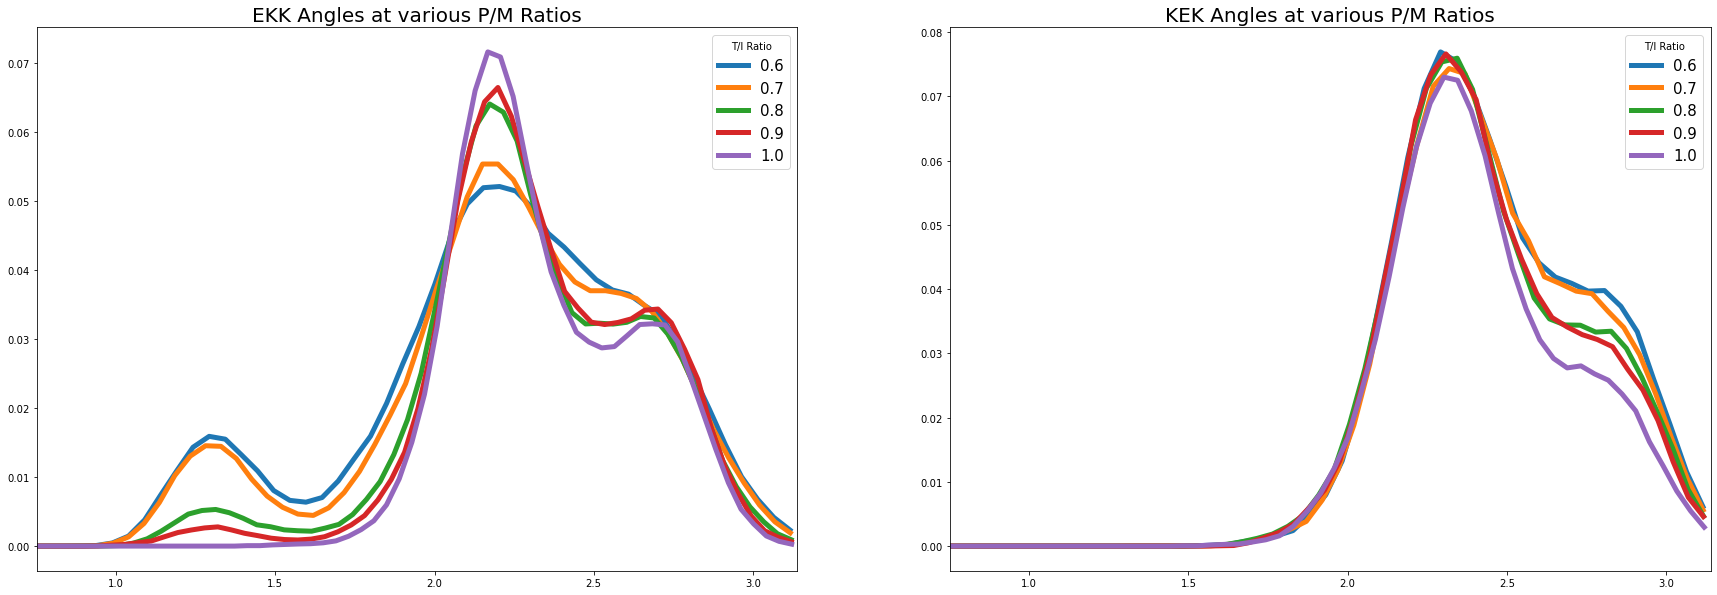

In [5]:
fig, ax = plt.subplots(1,2, figsize=(30,10))

for weight, job in project2.find_jobs(
    filter={"polymer_lengths": [16], "kT_quench": 6.5, "remove_hydrogens": True}).groupby("para_weight"):
    job = list(job)[0]
    ekk = angle_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "E",
        B_name = "K",
        C_name = "K",
        start=-300,
        histogram=True,
        normalize=True
    )
    smooth = moving_average_smoothing(ekk[:,1], w=5)
    ax[0].plot(ekk[:,0], smooth, label=weight, linewidth=5)

    kek = angle_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "K",
        B_name = "E",
        C_name = "K",
        start=-300,
        histogram=True,
        normalize=True
    )
    smooth = moving_average_smoothing(kek[:,1], w=5)
    ax[1].plot(kek[:,0], smooth, label=weight, linewidth=5)
    
ax[0].legend(title="T/I Ratio", fontsize=15)
ax[0].set_title("EKK Angles at various P/M Ratios", size=20)
ax[1].legend(title="T/I Ratio", fontsize=15)
ax[1].set_title("KEK Angles at various P/M Ratios", size=20)
ax[0].set_xlim(0.75, 3.14)
ax[1].set_xlim(0.75, 3.14)

In [7]:
no_charges = []
old_charges = []
new_charges = []

for weight, job in project.find_jobs({"charges": None}).groupby("para_weight"):
    no_charges.append(list(job)[0])

In [8]:
for weight, job in project.find_jobs({"charges": "antechamber", "remove_hydrogens": True}).groupby("para_weight"):
    old_charges.append(list(job)[0])

In [9]:
for weight, job in project2.find_jobs({"remove_hydrogens": True}).groupby("para_weight"):
    new_charges.append(list(job)[0])

In [10]:
len(new_charges)

5

In [11]:
len(old_charges)

5

In [14]:
for job in no_charges:
    print(job.sp.remove_hydrogens)

True
True
True
True
True


# Bond Lengths:

### For a given polymer length, sweep over the P/M Ratios

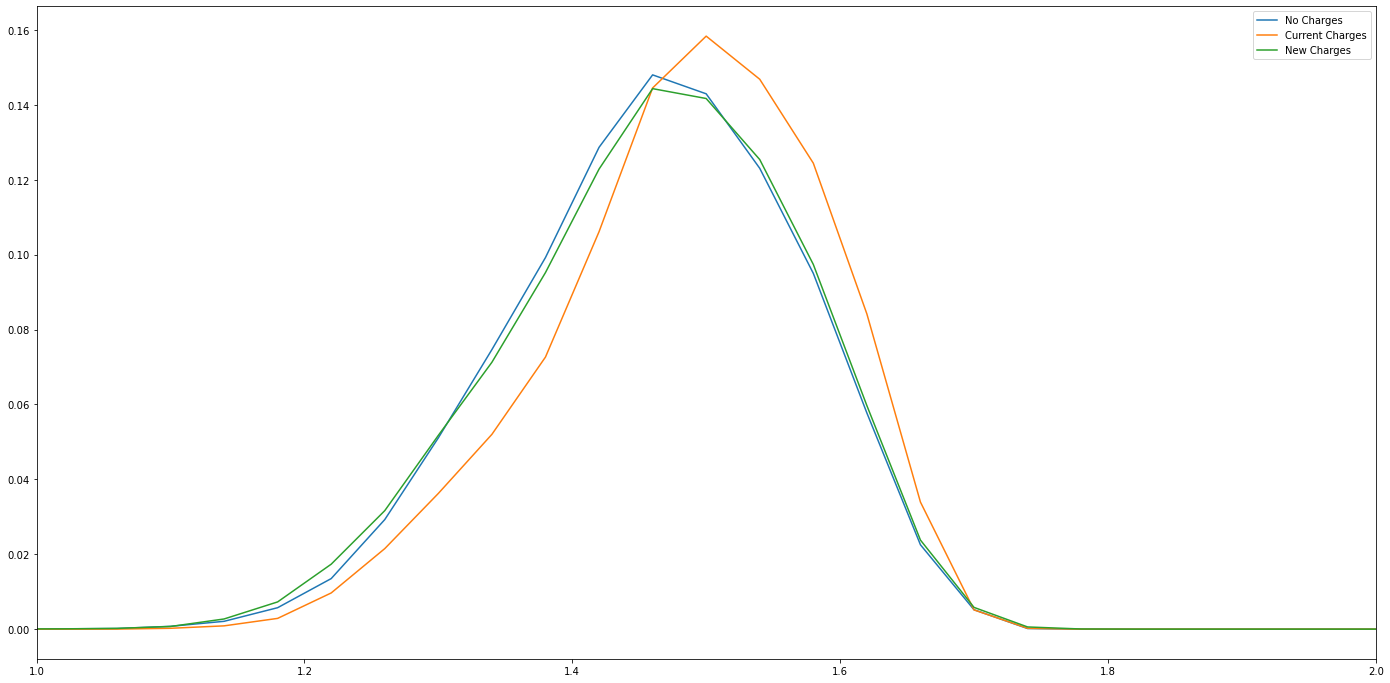

In [25]:
fig = plt.figure(figsize=(24, 12))
pair = ["K", "K"]
job_index = 1

bond0 = bond_distribution(
    gsd_file = no_charges[job_index].fn("components.gsd"),
    A_name = pair[0],
    B_name = pair[1],
    start=-300,
    histogram=True
)
smooth = moving_average_smoothing(bond0[:,1], w=5)
plt.plot(bond0[:,0], smooth, label="No Charges")

bond1 = bond_distribution(
    gsd_file = old_charges[job_index].fn("components.gsd"),
    A_name = pair[0],
    B_name = pair[1],
    start=-300,
    histogram=True
)
smooth = moving_average_smoothing(bond1[:,1], w=5)
plt.plot(bond1[:,0], smooth, label="Current Charges")

bond2 = bond_distribution(
    gsd_file = new_charges[job_index].fn("components.gsd"),
    A_name = pair[0],
    B_name = pair[1],
    start=-300,
    histogram=True
)
smooth = moving_average_smoothing(bond2[:,1], w=5)
plt.plot(bond2[:,0], smooth, label="New Charges")

plt.legend()
plt.xlim(1, 2)
plt.show()

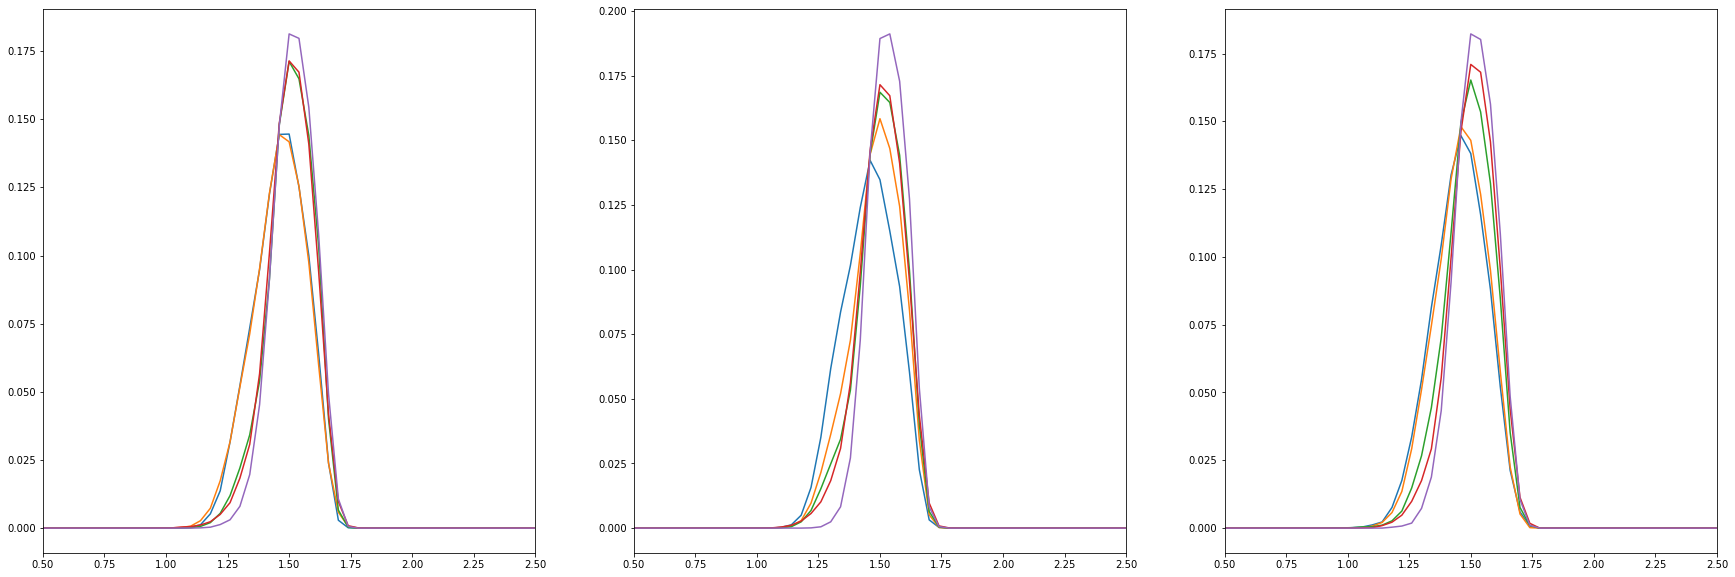

In [27]:
fig, ax = plt.subplots(1,3, figsize=(30,10))

for idx, jobs in enumerate([new_charges, old_charges, no_charges]):
    for job in jobs:
        bond0 = bond_distribution(
            gsd_file = job.fn("components.gsd"),
            A_name = pair[0],
            B_name = pair[1],
            start=-300,
            histogram=True
        )
        smooth = moving_average_smoothing(bond0[:,1], w=5)
        ax[idx].plot(bond0[:,0], smooth, label=job.sp.para_weight)
        ax[idx].set_xlim(0.5, 2.5)

# Angles

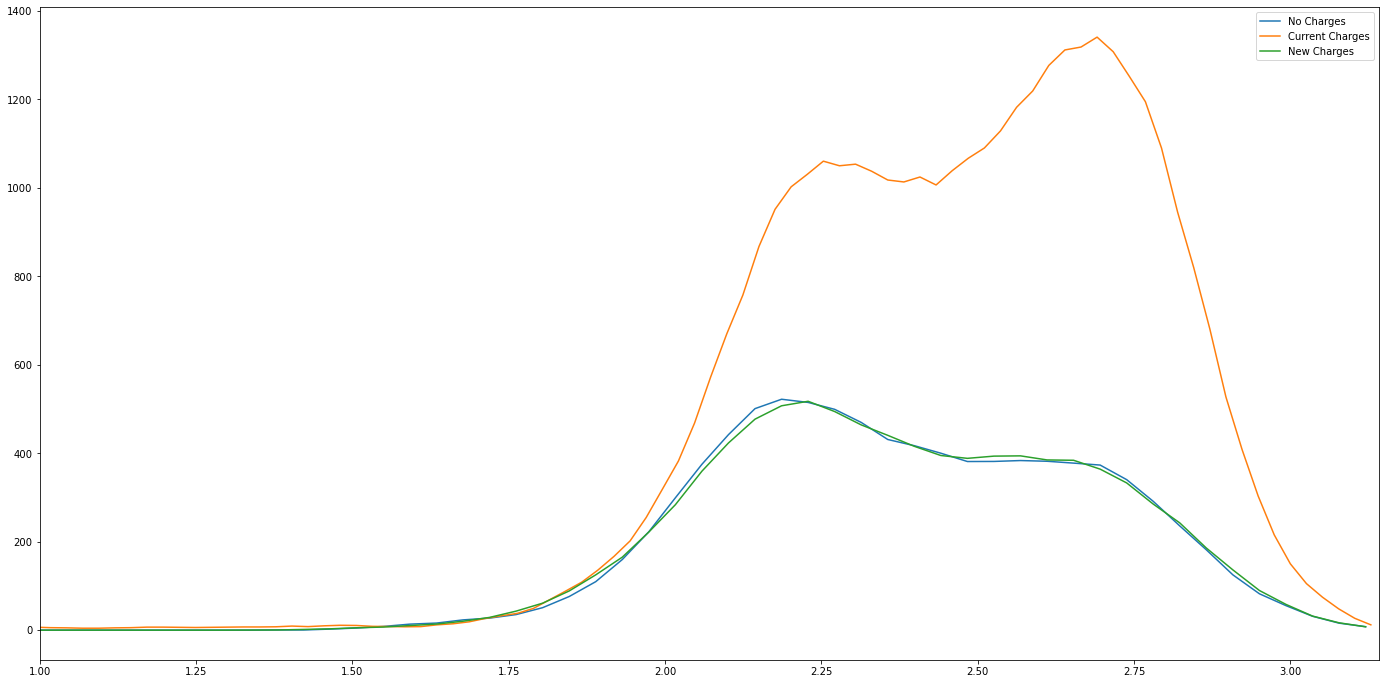

In [15]:
fig = plt.figure(figsize=(24, 12))
pair = ["E", "K", "K"]
job_index = 4

bond0 = angle_distribution(
    gsd_file = no_charges[job_index].fn("components.gsd"),
    A_name=pair[0],
    B_name=pair[1],
    C_name=pair[2],
    start=-300,
    histogram=True
)
smooth = moving_average_smoothing(bond0[:,1], w=5)
plt.plot(bond0[:,0], smooth, label="No Charges")

bond1 = angle_distribution(
    gsd_file = old_charges[job_index].fn("components.gsd"),
    A_name = pair[0],
    B_name = pair[1],
    C_name=pair[2],
    start=-300,
    histogram=True
)
smooth = moving_average_smoothing(bond1[:,1], w=5)
plt.plot(bond1[:,0], smooth, label="Current Charges")

bond2 = angle_distribution(
    gsd_file = new_charges[job_index].fn("components.gsd"),
    A_name = pair[0],
    B_name = pair[1],
    C_name=pair[2],
    start=-300,
    histogram=True
)
smooth = moving_average_smoothing(bond2[:,1], w=5)
plt.plot(bond2[:,0], smooth, label="New Charges")

plt.legend()
plt.xlim(1, np.pi)
plt.show()

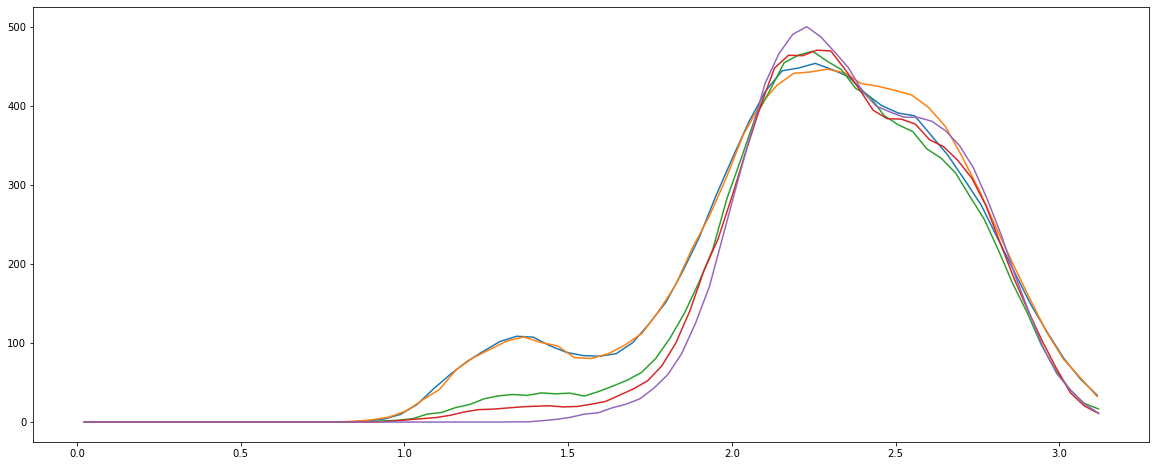

In [34]:
fig = plt.figure(figsize=(20,8))
for job in no_charges:
    bond0 = angle_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name=pair[0],
        B_name=pair[1],
        C_name=pair[2],
        start=-300,
        histogram=True
    )
    smooth = moving_average_smoothing(bond0[:,1], w=7)
    plt.plot(bond0[:,0], smooth, label=job.sp.para_weight)

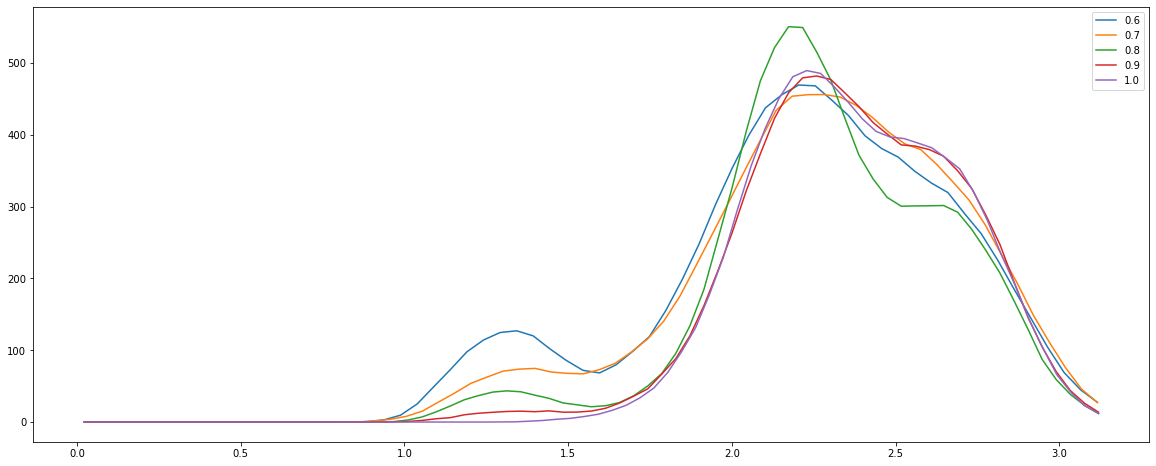

In [36]:
fig = plt.figure(figsize=(20,8))
for job in new_charges:
    bond0 = angle_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name=pair[0],
        B_name=pair[1],
        C_name=pair[2],
        start=-300,
        histogram=True
    )
    smooth = moving_average_smoothing(bond0[:,1], w=7)
    plt.plot(bond0[:,0], smooth, label=job.sp.para_weight)

plt.legend()

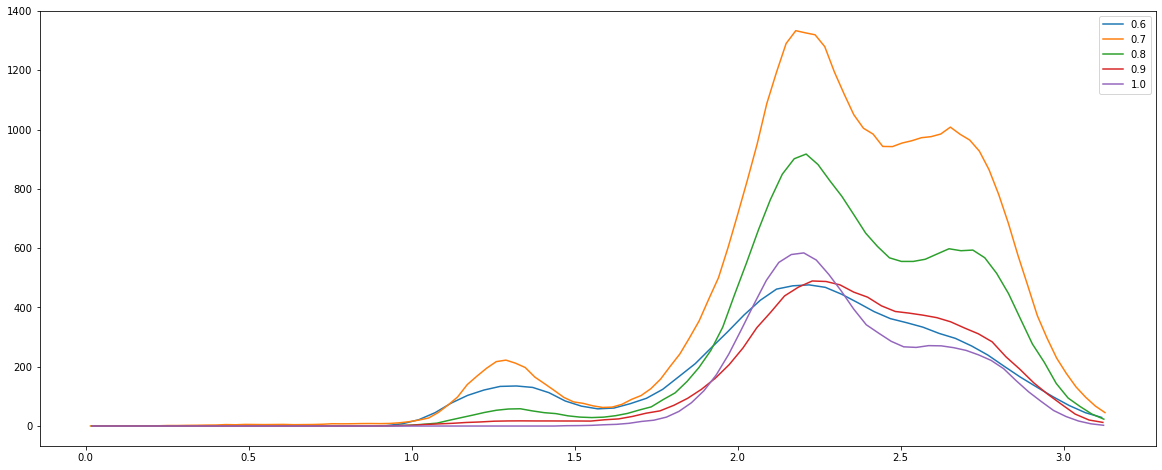

In [37]:
fig = plt.figure(figsize=(20,8))
for job in old_charges:
    bond0 = angle_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name=pair[0],
        B_name=pair[1],
        C_name=pair[2],
        start=-300,
        histogram=True
    )
    smooth = moving_average_smoothing(bond0[:,1], w=7)
    plt.plot(bond0[:,0], smooth, label=job.sp.para_weight)

plt.legend()

721f15492071a94bcf2c2dc4def3e12a 0.6
96f91231bd10ec9c88ef73a941aaa932 0.7
df157fbc8369e0c276558c8fa8226e2c 0.8
3f86b0cc4e47db65529963d32148bbaa 0.9
70530f7322131195a223583a208eaef3 1.0


Text(0.5, 1.0, 'KK Bonds at various P/M Ratios')

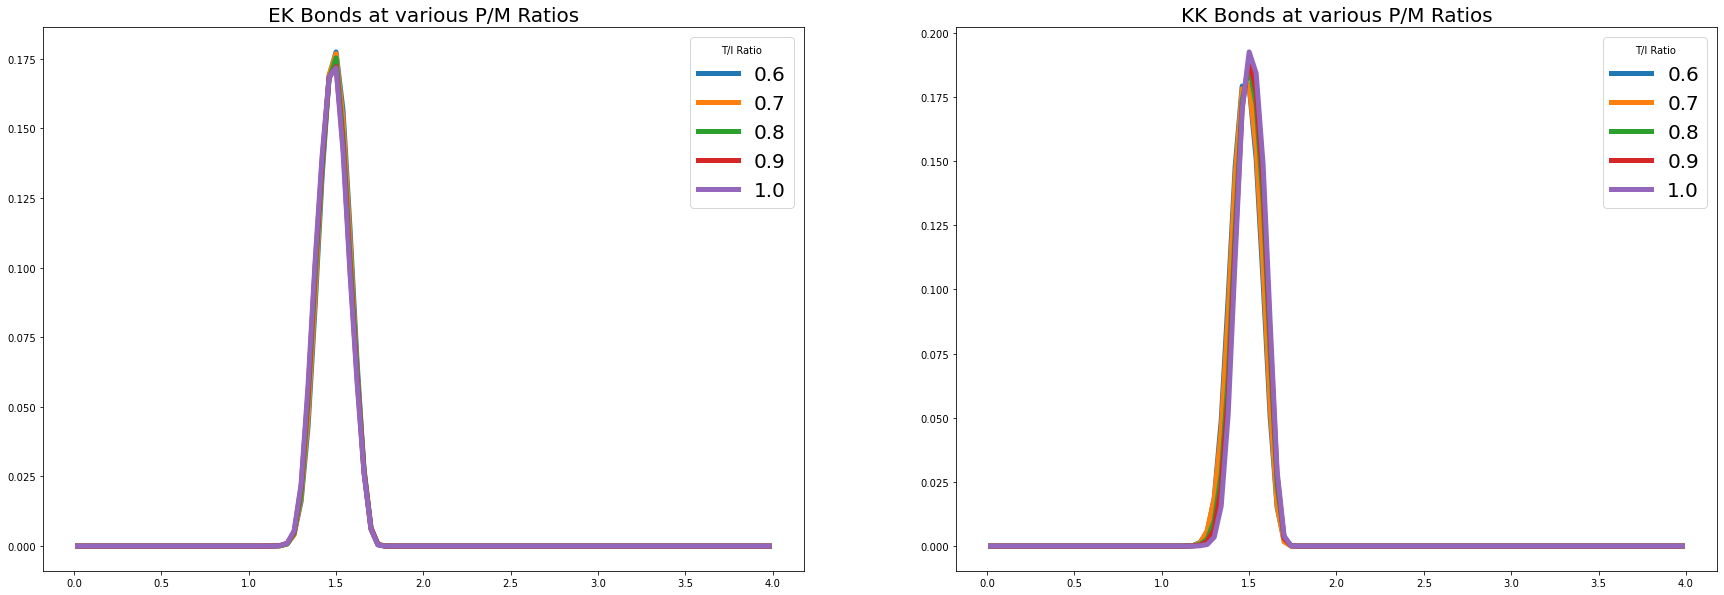

In [18]:
fig, ax = plt.subplots(1,3, figsize=(30,10))

for weight, job in project.find_jobs(
    filter={"polymer_lengths": [16], "remove_hydrogens": False, "kT_quench": 6.5}).groupby("para_weight"):
    job = list(job)[0]
    print(job.id, weight)
    ek = bond_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "E",
        B_name = "K",
        start=-300,
        histogram=True
    )
    smooth = moving_average_smoothing(ek[:,1], w=5)
    ax[0].plot(ek[:,0], smooth, label=weight, linewidth=5)

    kk = bond_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "K",
        B_name = "K",
        start=-300,
        histogram=True
    )
    smooth = moving_average_smoothing(kk[:,1], w=5)
    ax[1].plot(kk[:,0], smooth, label=weight, linewidth=5)
    
ax[0].legend(title="T/I Ratio", fontsize=20)
#ax[0].set_xlim(1, 2)
#ax[1].set_xlim(1, 2)
ax[0].set_title("EK Bonds at various P/M Ratios", size=20)
ax[1].legend(title="T/I Ratio", fontsize=20)
ax[1].set_title("KK Bonds at various P/M Ratios", size=20)

# Bond Lengths:

### For a given P/M ratio, sweep over polymer lengths:

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
para_weight = 1.0
for weight, job in project.find_jobs(
    filter={"para_weight": para_weight, "remove_hydrogens": False}, doc_filter={"done": True}).groupby("polymer_lengths"):
    job = list(job)[0]
    print(job.id, weight)
    ek = bond_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "E",
        B_name = "K",
        start=-300,
        histogram=True,
        normalize=True
    )
    smooth = moving_average_smoothing(ek[:,1], w=5)
    ax[0].plot(ek[:,0], smooth, label=weight[0], linewidth=5)

    kk = bond_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "K",
        B_name = "K",
        start=-300,
        histogram=True,
        normalize=True
    )
    smooth = moving_average_smoothing(kk[:,1], w=5)
    ax[1].plot(kk[:,0], smooth, label=weight[0], linewidth=5)
    
ax[0].legend(title="Length", fontsize=20)
ax[0].set_xlim(1, 2)
ax[1].set_xlim(1, 2)
ax[0].set_title("EK Bond: T/I Ratio {para_weight}", size=20)
ax[1].legend(title="Length", fontsize=20)
ax[1].set_title("KK Bond: T/I Ratio {para_weight}", size=20)

# Bond Lengths:

### Compare UA to AA:

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
para_weight = 0.60
polymer_lengths = [16]

for job in project.find_jobs({"para_weight": para_weight, "polymer_lengths": polymer_lengths}):
    print(job.id, job.sp.remove_hydrogens)
    ek = bond_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "E",
        B_name = "K",
        start=-300,
        histogram=True,
        normalize=True
    )
    smooth = moving_average_smoothing(ek[:,1], w=5)
    ax[0].plot(ek[:,0], smooth, label=job.sp.remove_hydrogens, linewidth=5)

    kk = bond_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "K",
        B_name = "K",
        start=-300,
        histogram=True,
        normalize=True
    )
    smooth = moving_average_smoothing(kk[:,1], w=5)
    ax[1].plot(kk[:,0], smooth, label=job.sp.remove_hydrogens, linewidth=5)
    
ax[0].legend(title="Length", fontsize=20)
ax[0].set_xlim(1, 2)
ax[1].set_xlim(1, 2)
ax[0].set_title("EK Bond: T/I Ratio {para_weight}", size=20)
ax[1].legend(title="Length", fontsize=20)
ax[1].set_title("KK Bond: T/I Ratio {para_weight}", size=20)

# Bond Lengths:

### Sweep over para weights of UA systems:

97c4266177382d1c394a3817dd50cd7e 0.6
2f30b08082d8372f2ee314408655528a 0.7
370cc43fb956726a669402c91ad54de6 0.8
059dbf7438243714ecab17f4e763a603 0.9
f6f31aba17190e99725cb964b03212ee 1.0


Text(0.5, 1.0, 'KK Bonds at various P/M Ratios')

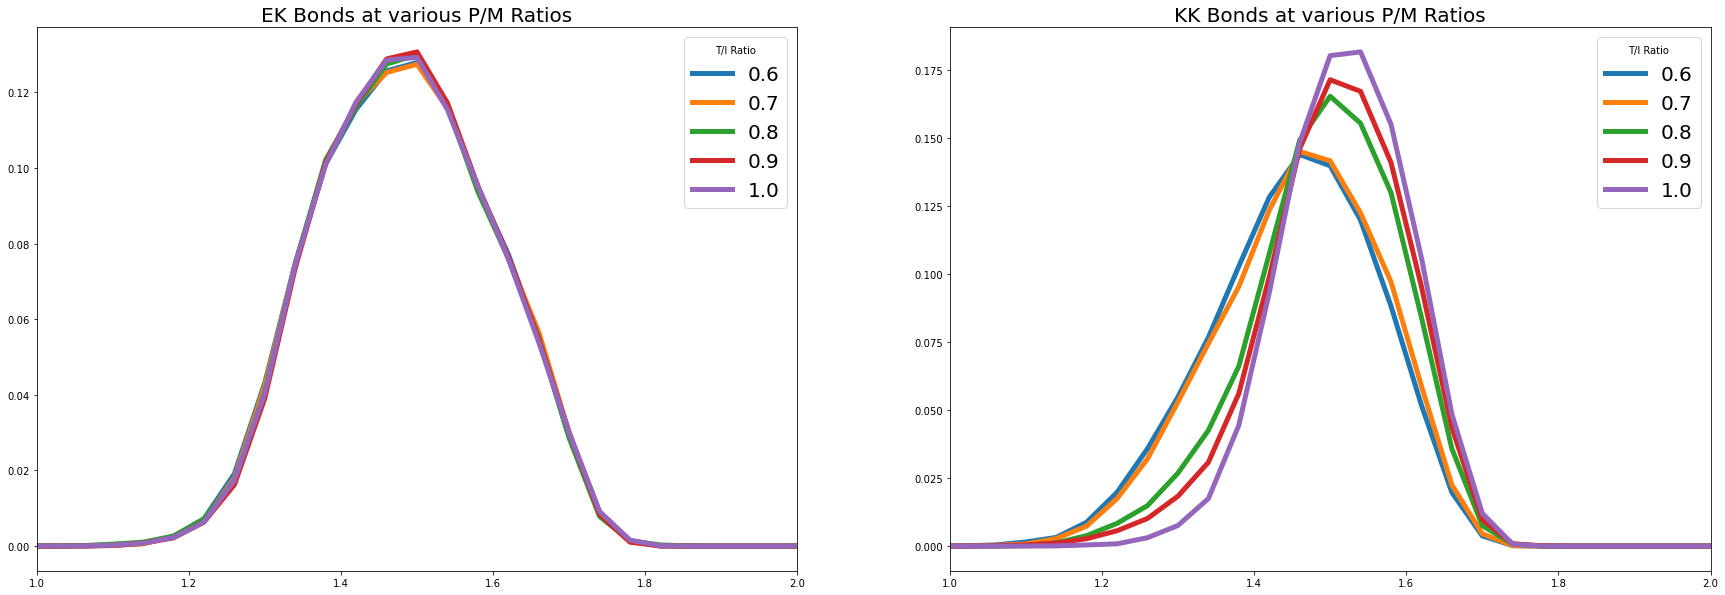

In [21]:
fig, ax = plt.subplots(1,2, figsize=(30,10))

for weight, job in project.find_jobs(
    filter={"polymer_lengths": [16], "remove_hydrogens": True, "kT_quench": 9.5}).groupby("para_weight"):
    job = list(job)[0]
    print(job, weight)
    ek = bond_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "E",
        B_name = "K",
        start=-300,
        histogram=True
    )
    smooth = moving_average_smoothing(ek[:,1], w=5)
    ax[0].plot(ek[:,0], smooth, label=weight, linewidth=5)

    kk = bond_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "K",
        B_name = "K",
        start=-300,
        histogram=True
    )
    smooth = moving_average_smoothing(kk[:,1], w=5)
    ax[1].plot(kk[:,0], smooth, label=weight, linewidth=5)
    
ax[0].legend(title="T/I Ratio", fontsize=20)
ax[0].set_xlim(1, 2)
ax[1].set_xlim(1, 2)
ax[0].set_title("EK Bonds at various P/M Ratios", size=20)
ax[1].legend(title="T/I Ratio", fontsize=20)
ax[1].set_title("KK Bonds at various P/M Ratios", size=20)

# Bond Angles:

### For a given polymer length, sweep over the P/M Ratios

Text(0.5, 1.0, 'KEK Angles at various P/M Ratios')

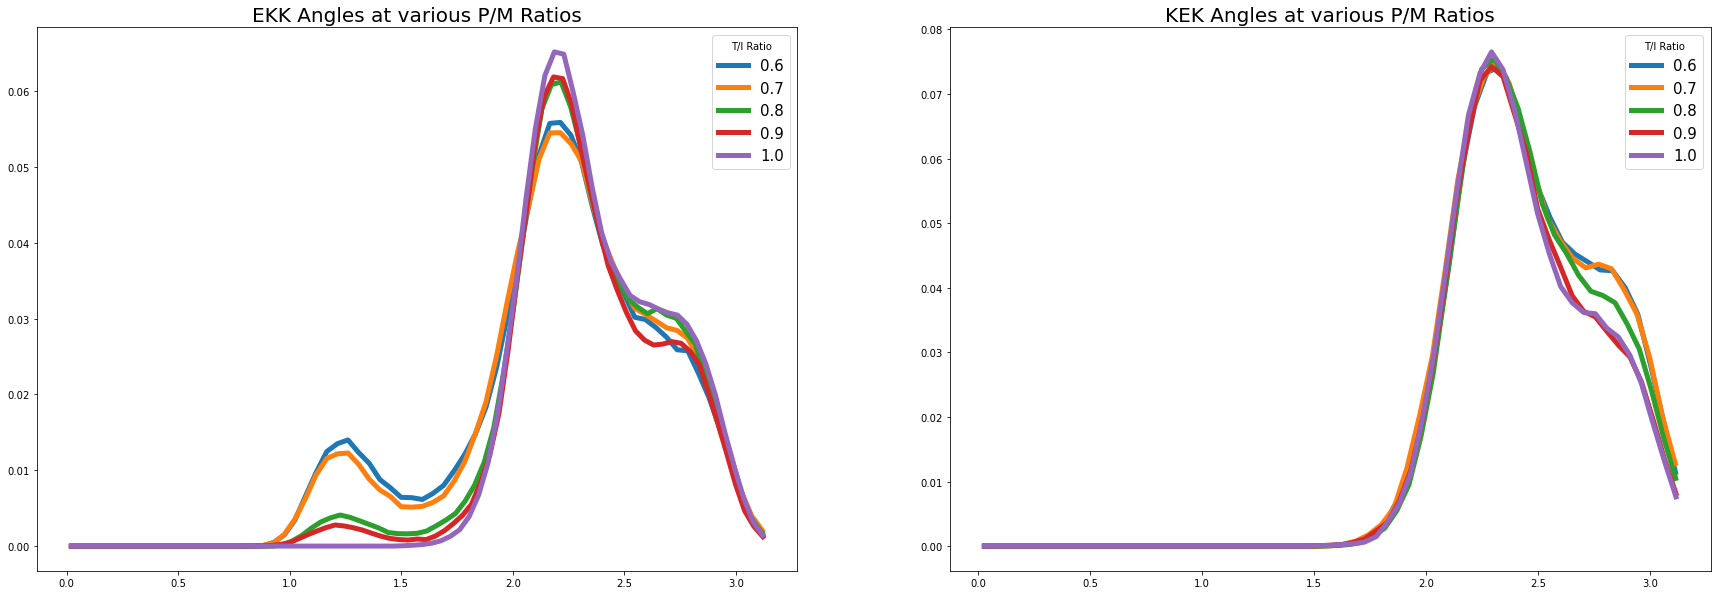

In [31]:
project = signac.get_project("../target-sims/single-chain-target-runs/polybinder-flow/")
fig, ax = plt.subplots(1,2, figsize=(30,10))

for weight, job in project.find_jobs(
    filter={"polymer_lengths": [16], "kT_quench": 6.5, "remove_hydrogens": False}).groupby("para_weight"):
    job = list(job)[0]
    ekk = angle_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "E",
        B_name = "K",
        C_name = "K",
        start=-300,
        histogram=True,
        normalize=True
    )
    smooth = moving_average_smoothing(ekk[:,1], w=5)
    ax[0].plot(ekk[:,0], smooth, label=weight, linewidth=5)

    kek = angle_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "K",
        B_name = "E",
        C_name = "K",
        start=-300,
        histogram=True,
        normalize=True
    )
    smooth = moving_average_smoothing(kek[:,1], w=5)
    ax[1].plot(kek[:,0], smooth, label=weight, linewidth=5)
    
ax[0].legend(title="T/I Ratio", fontsize=15)
ax[0].set_title("EKK Angles at various P/M Ratios", size=20)
ax[1].legend(title="T/I Ratio", fontsize=15)
ax[1].set_title("KEK Angles at various P/M Ratios", size=20)
#ax[0].set_xlim(0.75, 3.14)
#ax[1].set_xlim(0.75, 3.14)

In [26]:
project = signac.get_project("../side-projects/single-chain-new-chrages/polybinder-flow/")

Text(0.5, 1.0, 'KEK Angles at various P/M Ratios')

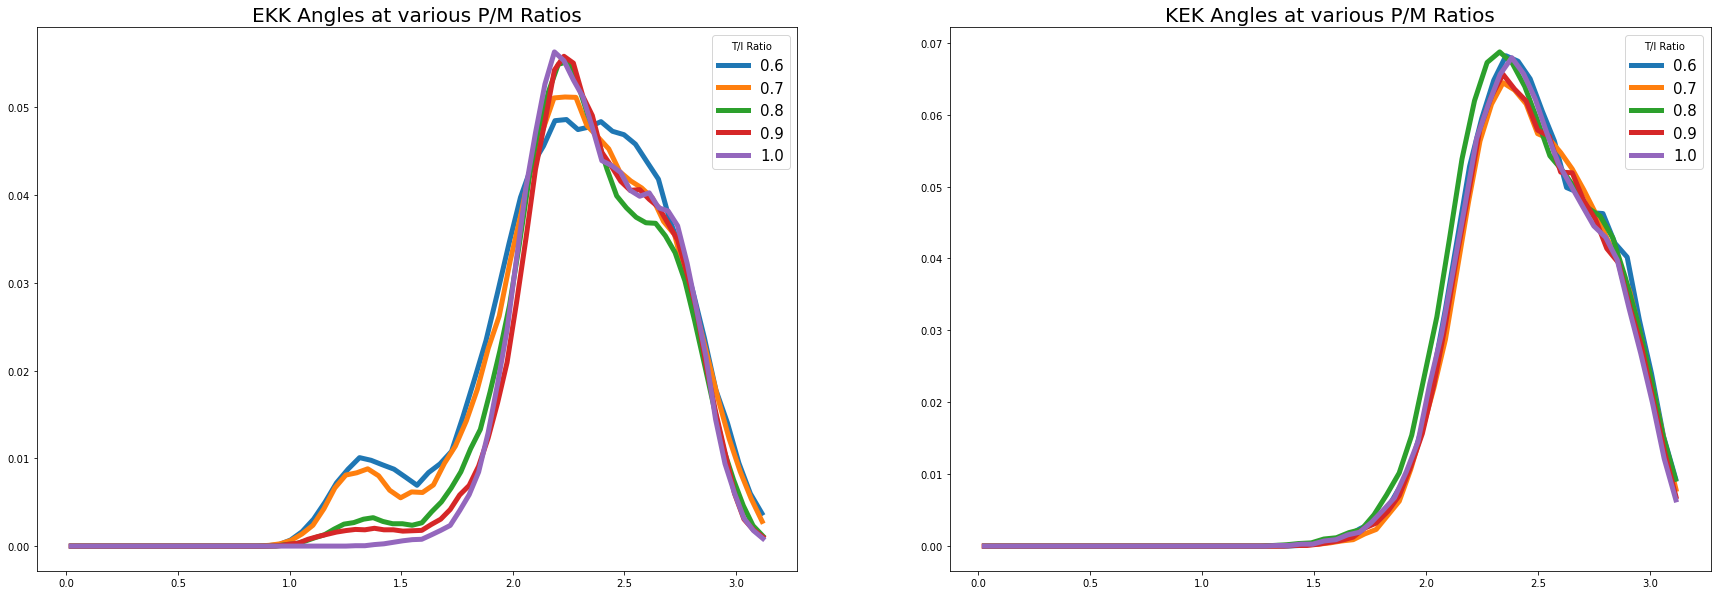

In [29]:
fig, ax = plt.subplots(1,2, figsize=(30,10))

for weight, job in project.find_jobs(
    filter={"polymer_lengths": [16], "kT_quench": 9.5, "remove_hydrogens": True}).groupby("para_weight"):
    job = list(job)[0]
    ekk = angle_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "E",
        B_name = "K",
        C_name = "K",
        start=-300,
        histogram=True,
        normalize=True
    )
    smooth = moving_average_smoothing(ekk[:,1], w=5)
    ax[0].plot(ekk[:,0], smooth, label=weight, linewidth=5)

    kek = angle_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "K",
        B_name = "E",
        C_name = "K",
        start=-300,
        histogram=True,
        normalize=True
    )
    smooth = moving_average_smoothing(kek[:,1], w=5)
    ax[1].plot(kek[:,0], smooth, label=weight, linewidth=5)
    
ax[0].legend(title="T/I Ratio", fontsize=15)
ax[0].set_title("EKK Angles at various P/M Ratios", size=20)
ax[1].legend(title="T/I Ratio", fontsize=15)
ax[1].set_title("KEK Angles at various P/M Ratios", size=20)
#ax[0].set_xlim(0.75, 3.14)
#ax[1].set_xlim(0.75, 3.14)

# Bond Angles:

### For a given P/M Ratio, sweep over polymer lengths

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
para_weight = 0.60
for weight, job in project.find_jobs(
    filter={"para_weight": para_weight}, doc_filter={"done": True}).groupby("polymer_lengths"):
    job = list(job)[0]
    ekk = angle_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "E",
        B_name = "K",
        C_name = "K",
        start=-300,
        histogram=True,
        normalize=True
    )
    smooth = moving_average_smoothing(ekk[:,1], w=5)
    ax[0].plot(ekk[:,0], smooth, label=weight[0], linewidth=5)

    kek = angle_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "K",
        B_name = "E",
        C_name = "K",
        start=-300,
        histogram=True,
        normalize=True
    )
    smooth = moving_average_smoothing(kek[:,1], w=5)
    ax[1].plot(kek[:,0], smooth, label=weight[0], linewidth=5)
    
ax[0].legend(fontsize=20, title="Length")
ax[0].set_title(f"EKK Angle: T/I Ratio {para_weight}", size=20)
ax[0].legend(fontsize=20, title="Length")
ax[1].set_title("KEK Angle: T/I Ratio {para_weight}", size=20)

# Looking at bond and angle distributions for UA Single Chains at Higher Temps
- The UA single-chain systems during the initial run (kT=6.5) seemed to be stuck in the globule phase
- This wasn't really the case in the AA systems
- The AA systems didn't see a para-meta trend in the bond length distributions, but the UA runs did.
- Ran more single chain sims at higher temps to see if we can get a UA run where the chain is in both globule and coil phases; see if this corrects things

In [ ]:
project = signac.get_project("../side-projects/theta-point-sweep/polybinder-flow/")

In [ ]:
project.detect_schema()

# Radius of Gyration and End-to-End Distance

In [ ]:
%matplotlib qt

for weight, job in project.find_jobs(
    filter={"polymer_lengths": [16], "remove_hydrogens": False},
    doc_filter={"done": True}).groupby("para_weight"):
    job = list(job)[0]
    
    sys = System(
        compound="PEKK",
        gsd_file=job.fn("sim_traj.gsd")
   )

    for mol in sys.molecules:
        mol.sequence = job.doc.chain_sequences[0]
        mol.assign_types()
    for mon in sys.monomers():
        mon.generate_components(index_mapping="ring_plus_linkage_UA")
    
    rg_values = []
    for i in range(0, 450):
        sys.update_frame(frame=-(i+1))
        rg = sys.radii_of_gyration(use_components=True)
        rg_values.append(rg)
    bin_centers, bin_heights = get_histogram(rg_values)
    smoothed = moving_average_smoothing(bin_heights, w=3)
    plt.plot(bin_centers, smoothed, "o-", label=weight)
    

plt.legend()
plt.show()    
    

# Theta Temperature Sweep:

In [3]:
project = signac.get_project("../side-projects/theta-point-sweep/polybinder-flow/")

In [ ]:
project.detect_schema()

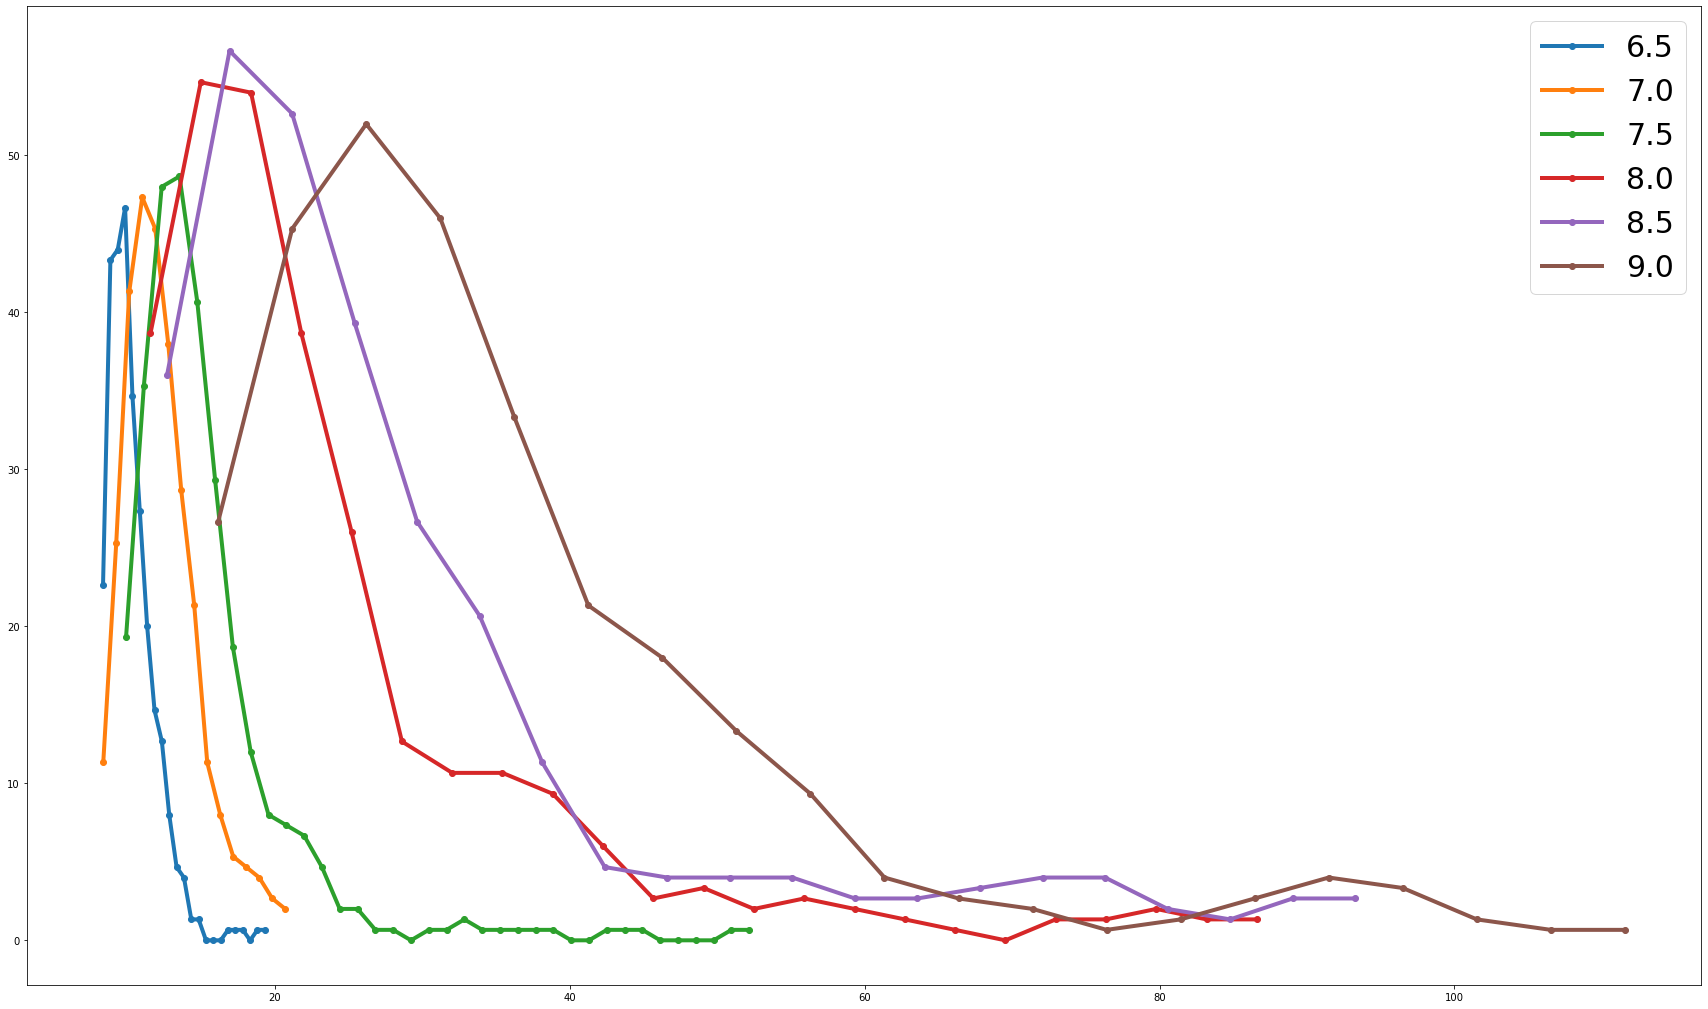

In [10]:
%matplotlib inline
fig = plt.figure(figsize=(30, 18))
for temp, job in project.find_jobs(filter={"remove_hydrogens": True}).groupby("kT_quench"):
    if temp > 9.0: continue
    job = list(job)[0]
    
    sys = System(
        compound="PEKK",
        gsd_file=job.fn("sim_traj.gsd")
   )

    for mol in sys.molecules:
        mol.sequence = job.doc.chain_sequences[0]
        mol.assign_types()
    for mon in sys.monomers():
        mon.generate_components(index_mapping="ring_plus_linkage_UA")
    
    rg_values = []
    for i in range(0, 300):
        sys.update_frame(frame=-(i+1))
        rg = sys.radii_of_gyration(use_components=True)
        rg_values.append(rg)
        
    bin_centers, bin_heights = get_histogram(rg_values)
    smoothed = moving_average_smoothing(bin_heights, w=3)
    plt.plot(bin_centers, smoothed, "o-", label=temp, linewidth=4)
    

plt.legend(fontsize=30)
plt.show()    

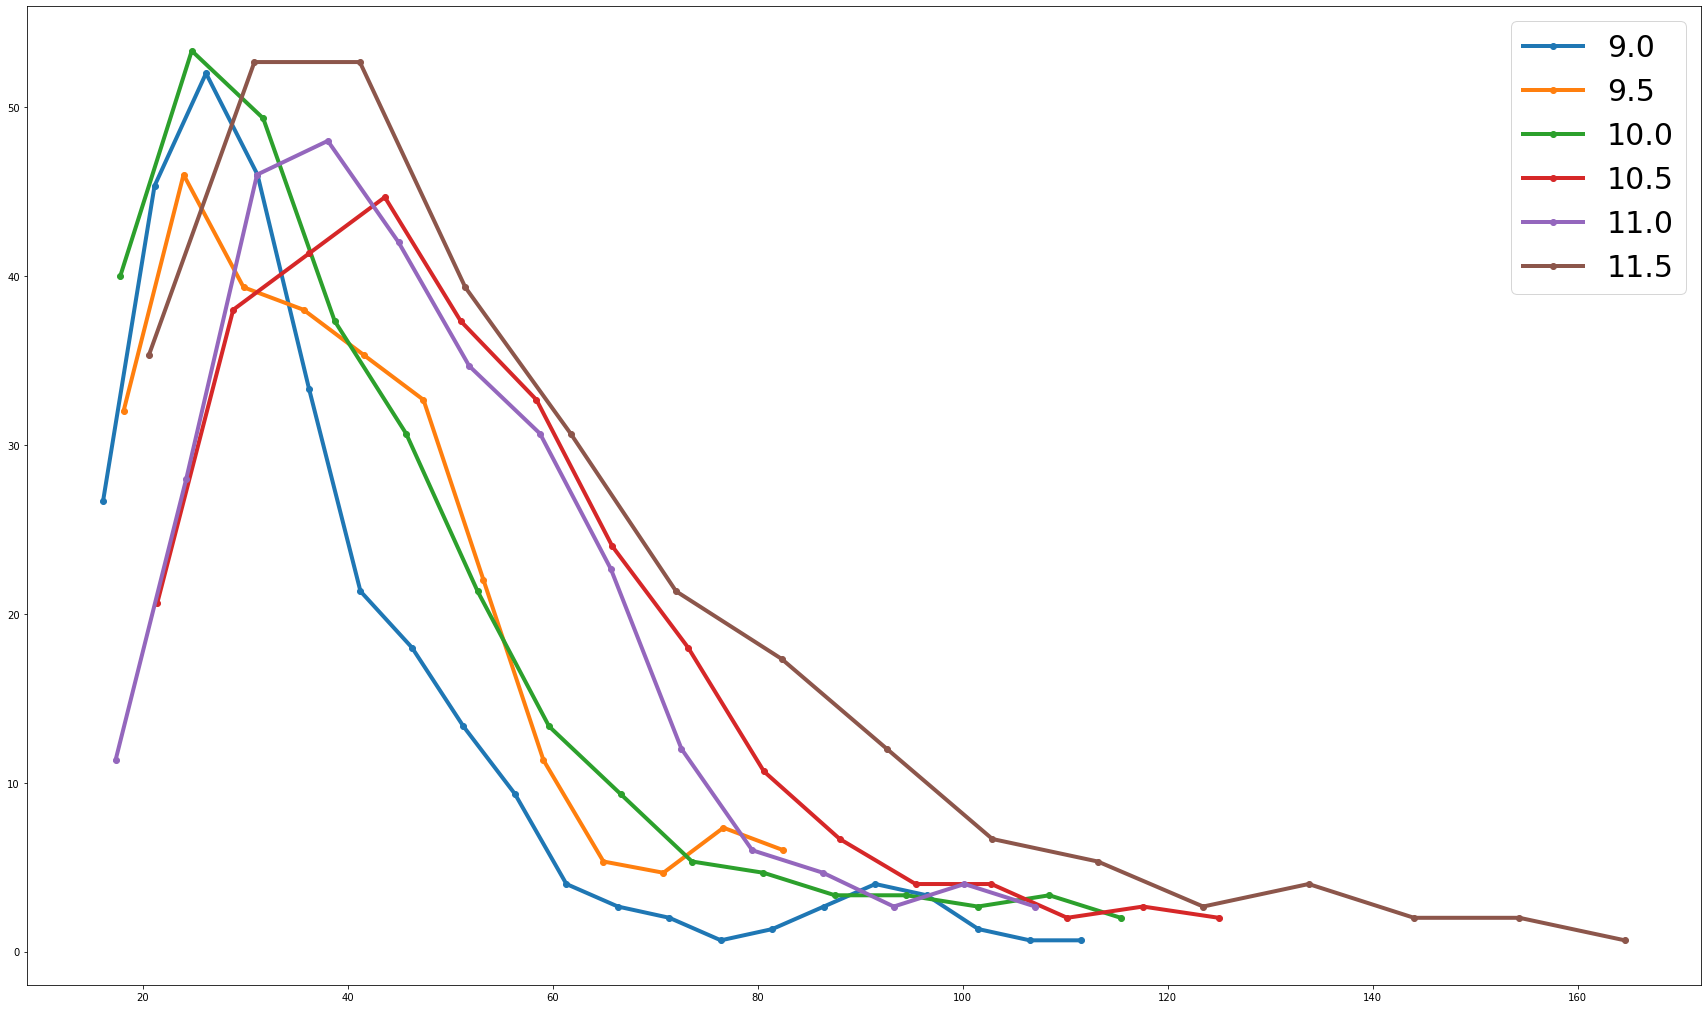

In [11]:
%matplotlib inline
fig = plt.figure(figsize=(30, 18))
for temp, job in project.find_jobs(filter={"remove_hydrogens": True}).groupby("kT_quench"):
    if temp < 9.0: continue
    job = list(job)[0]
    
    sys = System(
        compound="PEKK",
        gsd_file=job.fn("sim_traj.gsd")
   )

    for mol in sys.molecules:
        mol.sequence = job.doc.chain_sequences[0]
        mol.assign_types()
    for mon in sys.monomers():
        mon.generate_components(index_mapping="ring_plus_linkage_UA")
    
    rg_values = []
    for i in range(0, 300):
        sys.update_frame(frame=-(i+1))
        rg = sys.radii_of_gyration(use_components=True)
        rg_values.append(rg)
        
    bin_centers, bin_heights = get_histogram(rg_values)
    smoothed = moving_average_smoothing(bin_heights, w=3)
    plt.plot(bin_centers, smoothed, "o-", label=temp, linewidth=4)
    

plt.legend(fontsize=30)
plt.show()  

In [ ]:
for temp, job in project.find_jobs(filter={"remove_hydrogens": False}).groupby("kT_quench"):
    job = list(job)[0]
    
    sys = System(
        compound="PEKK",
        gsd_file=job.fn("sim_traj.gsd")
   )

    for mol in sys.molecules:
        mol.sequence = job.doc.chain_sequences[0]
        mol.assign_types()
    for mon in sys.monomers():
        mon.generate_components(index_mapping="ring_plus_linkage_UA")
    
    rg_values = []
    for i in range(0, 450):
        sys.update_frame(frame=-(i+1))
        rg = sys.radii_of_gyration(use_components=True)
        rg_values.append(rg)
        
    bin_centers, bin_heights = get_histogram(rg_values)
    smoothed = moving_average_smoothing(bin_heights, w=3)
    plt.plot(bin_centers, smoothed, "o-", label=temp)
    

plt.legend()
plt.show()  

# Compare UA to AA at a single temp

In [ ]:

kT_quench = 9.5
for temp, job in project.find_jobs(filter={"kT_quench": kT_quench}).groupby("remove_hydrogens"):
    job = list(job)[0]
    print(job)
    sys = System(
        compound="PEKK",
        gsd_file=job.fn("sim_traj.gsd")
   )

    for mol in sys.molecules:
        mol.sequence = job.doc.chain_sequences[0]
        mol.assign_types()
    for mon in sys.monomers():
        mon.generate_components(index_mapping="ring_plus_linkage_UA")
    
    rg_values = []
    for i in range(0, 600):
        sys.update_frame(frame=-(i+1))
        rg = sys.radii_of_gyration(use_components=True)
        rg_values.append(rg)
        
    bin_centers, bin_heights = get_histogram(rg_values)
    smoothed = moving_average_smoothing(bin_heights, w=3)
    plt.plot(bin_centers, smoothed, "o-", label=temp)
    

plt.legend()
plt.show() 

# Look at bond length distributions over theta temp sweep:

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))

for temp, job in project.find_jobs(
    filter={"remove_hydrogens": True}).groupby("kT_quench"):
    job = list(job)[0]
    ek = bond_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "E",
        B_name = "K",
        start=-300,
        histogram=True
    )
    smooth = moving_average_smoothing(ek[:,1], w=5)
    ax[0].plot(ek[:,0], smooth, label=temp, linewidth=5)

    kk = bond_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "K",
        B_name = "K",
        start=-300,
        histogram=True
    )
    smooth = moving_average_smoothing(kk[:,1], w=5)
    ax[1].plot(kk[:,0], smooth, label=temp, linewidth=5)
    
ax[0].legend(title="T/I Ratio", fontsize=20)
ax[0].set_xlim(1, 2)
ax[1].set_xlim(1, 2)
ax[0].set_title("EK Bonds at various P/M Ratios", size=20)
ax[1].legend(title="T/I Ratio", fontsize=20)
ax[1].set_title("KK Bonds at various P/M Ratios", size=20)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))

for temp, job in project.find_jobs(
    filter={"remove_hydrogens": False}).groupby("kT_quench"):
    job = list(job)[0]
    ek = bond_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "E",
        B_name = "K",
        start=-300,
        histogram=True
    )
    smooth = moving_average_smoothing(ek[:,1], w=5)
    ax[0].plot(ek[:,0], smooth, label=temp, linewidth=5)

    kk = bond_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "K",
        B_name = "K",
        start=-300,
        histogram=True
    )
    smooth = moving_average_smoothing(kk[:,1], w=5)
    ax[1].plot(kk[:,0], smooth, label=temp, linewidth=5)
    
ax[0].legend(title="T/I Ratio", fontsize=20)
ax[0].set_xlim(1, 2)
ax[1].set_xlim(1, 2)
ax[0].set_title("EK Bonds at various P/M Ratios", size=20)
ax[1].legend(title="T/I Ratio", fontsize=20)
ax[1].set_title("KK Bonds at various P/M Ratios", size=20)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))

kT_quench = 9.5
for temp, job in project.find_jobs(
    filter={"kT_quench": kT_quench}).groupby("remove_hydrogens"):
    job = list(job)[0]
    print(job, temp)
    ek = bond_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "E",
        B_name = "K",
        start=-300,
        histogram=True
    )
    smooth = moving_average_smoothing(ek[:,1], w=5)
    ax[0].plot(ek[:,0], smooth, label=temp, linewidth=5)

    kk = bond_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "K",
        B_name = "K",
        start=-300,
        histogram=True
    )
    smooth = moving_average_smoothing(kk[:,1], w=5)
    ax[1].plot(kk[:,0], smooth, label=temp, linewidth=5)
    
ax[0].legend(title="T/I Ratio", fontsize=20)
ax[0].set_xlim(1, 2)
ax[1].set_xlim(1, 2)
ax[0].set_title("EK Bonds at various P/M Ratios", size=20)
ax[1].legend(title="T/I Ratio", fontsize=20)
ax[1].set_title("KK Bonds at various P/M Ratios", size=20)